# Phyiscs Problems - Lectures 22 & 23 - Homework 10

FALL 2024


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a function that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [2]:
import math

def altitude(T):
    """
    Calculate the altitude of a satellite in a circular orbit around Earth
    for a given orbital period T.

    Parameters:
    T (float): Orbital period in seconds.

    Returns:
    float: Altitude above Earth's surface in meters.
    """
    
    G = 6.67e-11  
    M = 5.97e24   
    R = 6371e3   

    h = (G * M * T**2 / (4 * math.pi**2))**(1/3) - R
    return h

T = float(input("Enter the desired orbital period T in seconds: "))
altitude_value = altitude(T)
print(f"The required altitude is {altitude_value:.2f} meters.")


Enter the desired orbital period T in seconds:  5


The required altitude is -6307822.83 meters.


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [4]:

import math

def altitude(T):
    """
    Calculate the altitude of a satellite in a circular orbit around Earth
    for a given orbital period T.

    Parameters:
    T (float): Orbital period in seconds.

    Returns:
    float: Altitude above Earth's surface in meters.
    """
    G = 6.67e-11 
    M = 5.97e24   
    R = 6371e3   

    h = (G * M * T**2 / (4 * math.pi**2))**(1/3) - R
    return h

geosync = 24 * 60 * 60  
hourhalf = 90 * 60      
min45 = 45 * 60       

print("24 hours: Altitude =", altitude(geosync), 
      "; 90 min: Altitude =", altitude(hourhalf),
      "; 45 min: Altitude =", altitude(min45))


24 hours: Altitude = 35855910.176174976 ; 90 min: Altitude = 279321.6253728606 ; 45 min: Altitude = -2181559.8978108233


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [ ]:
import math

def altitude(T):
    """
    Calculate the altitude of a satellite in a circular orbit around Earth
    for a given orbital period T.

    Parameters:
    T (float): Orbital period in seconds.

    Returns:
    float: Altitude above Earth's surface in meters.
    """
    G = 6.67e-11  
    M = 5.97e24 
    R = 6371e3   

    h = (G * M * T**2 / (4 * math.pi**2))**(1/3) - R
    return h

geosync = 24 * 60 * 60 
persidereal = 23.93 * 60 * 60  
hourhalf = 90 * 60     
min45 = 45 * 60        

persidereal = 0  

print("24 hours: Altitude =", altitude(geosync), 
      "; Sidereal day: Altitude =", altitude(persidereal),
      "; 90 min: Altitude =", altitude(hourhalf),
      "; 45 min: Altitude =", altitude(min45))


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

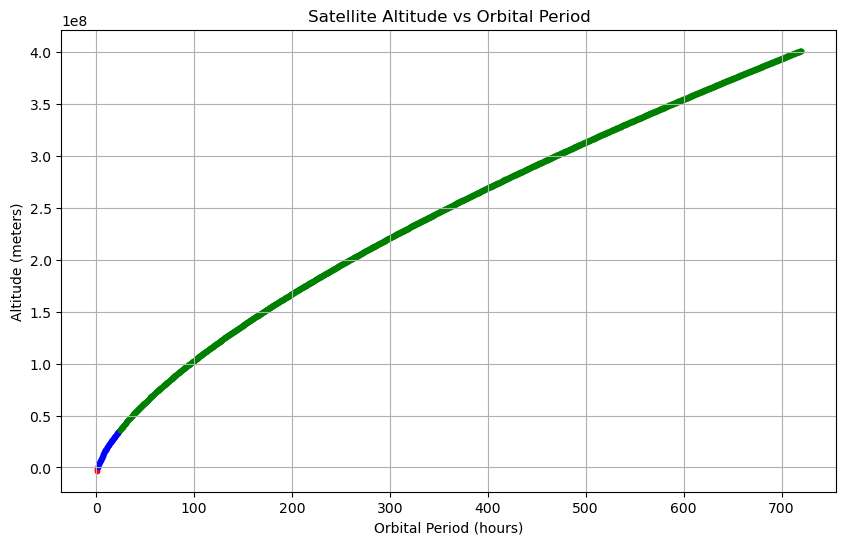

In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np

def altitude(T):
    """
    Calculate the altitude of a satellite in a circular orbit around Earth
    for a given orbital period T.

    Parameters:
    T (float): Orbital period in seconds.

    Returns:
    float: Altitude above Earth's surface in meters.
    """
    G = 6.67e-11 
    M = 5.97e24 
    R = 6371e3   

    h = (G * M * T**2 / (4 * math.pi**2))**(1/3) - R
    return h

time_hours = np.arange(0.5, 30 * 24 + 0.5, 0.5) 
time_seconds = time_hours * 3600  

altitudes = [altitude(T) for T in time_seconds]

geosync_period = 24 * 60 * 60  

plt.figure(figsize=(10, 6))

for t, h in zip(time_hours, altitudes):
    if h < 0:
        plt.scatter(t, h, color='red', s=10)  
    elif t < 24:  
        plt.scatter(t, h, color='blue', s=10) 
    else: 
        plt.scatter(t, h, color='green', s=10)  

plt.xlabel("Orbital Period (hours)")
plt.ylabel("Altitude (meters)")
plt.title("Satellite Altitude vs Orbital Period")

plt.grid(True)
plt.show()


### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [10]:
import math

def lorentz_factor(v):
    """
    Calculate the Lorentz factor (gamma).
    
    Parameters:
    v (float): Speed of the spaceship as a fraction of the speed of light.
    
    Returns:
    float: Lorentz factor (gamma).
    """
    return 1 / math.sqrt(1 - v**2)

def travel_time(x, v):
    """
    Calculate the travel time in both the Earth frame and the spaceship frame.
    
    Parameters:
    x (float): Distance to the other planet in light years.
    v (float): Speed of the spaceship as a fraction of the speed of light.
    
    Returns:
    tuple: Time on Earth (t) and time for the passenger on the spaceship (t').
    """
    gamma = lorentz_factor(v)
    
    t_earth = x / v
    
    t_ship = t_earth / gamma
    
    return t_earth, t_ship

x = float(input("Enter the distance to the other planet in light years (x): "))
v = float(input("Enter the speed of the spaceship as a fraction of the speed of light (v): "))

t_earth, t_ship = travel_time(x, v)

print(f"\nTime in the Earth frame (t): {t_earth:.2f} years")
print(f"Time in the spaceship frame (t'): {t_ship:.2f} years")


Enter the distance to the other planet in light years (x):  10
Enter the speed of the spaceship as a fraction of the speed of light (v):  .8



Time in the Earth frame (t): 12.50 years
Time in the spaceship frame (t'): 7.50 years


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [20]:
import math

def lorentz_factor(v):
    """
    Calculate the Lorentz factor (gamma).

    Parameters:
    v (float): Speed of the spaceship as a fraction of the speed of light.

    Returns:
    float: Lorentz factor (gamma).
    """
    return 1 / math.sqrt(1 - v**2)

def travel_time(x, v):
    """
    Calculate the travel time in both the Earth frame and the spaceship frame.

    Parameters:
    x (float): Distance to the other planet in light years.
    v (float): Speed of the spaceship as a fraction of the speed of light.

    Returns:
    tuple: Time on Earth (t) and time for the passenger on the spaceship (t').
    """
    gamma = lorentz_factor(v)

    t_earth = x / v
    t_ship = t_earth / gamma

    return t_earth, t_ship

distance = 10  # light years
speeds = [0.90, 0.98, 0.999]

for speed in speeds:
    t_earth, t_ship = travel_time(distance, speed)
    print(f"For v = {speed}c:")
    print(f"  Time on Earth: {t_earth:.2f} years")
    print(f"  Time on Spaceship: {t_ship:.2f} years\n")

For v = 0.9c:
  Time on Earth: 11.11 years
  Time on Spaceship: 4.84 years

For v = 0.98c:
  Time on Earth: 10.20 years
  Time on Spaceship: 2.03 years

For v = 0.999c:
  Time on Earth: 10.01 years
  Time on Spaceship: 0.45 years



### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [12]:
import math

def quadratic_equation(a, b, c):
    """
    Solve the quadratic equation ax^2 + bx + c = 0.

    Parameters:
    a (float): Coefficient of x^2.
    b (float): Coefficient of x.
    c (float): Constant term.

    Returns:
    tuple: Two solutions to the quadratic equation.
    """
    discriminant = b**2 - 4*a*c
    
    if discriminant < 0:
        return "No real solutions"

    x1 = (-b + math.sqrt(discriminant)) / (2 * a)
    x2 = (-b - math.sqrt(discriminant)) / (2 * a)
    
    return x1, x2

a = 0.001
b = 1000
c = 0.001

solutions = quadratic_equation(a, b, c)

if isinstance(solutions, tuple):
    print(f"Solutions: x1 = {solutions[0]:.5f}, x2 = {solutions[1]:.5f}")
else:
    print(solutions)


Solutions: x1 = -0.00000, x2 = -1000000.00000


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [14]:
import math

def quadratic_equation(a, b, c):
    """
    Solve the quadratic equation ax^2 + bx + c = 0.
    Outputs both standard and alternative forms of the solution.
    
    Parameters:
    a (float): Coefficient of x^2.
    b (float): Coefficient of x.
    c (float): Constant term.
    
    Returns:
    tuple: Solutions in both forms.
    """
    discriminant = b**2 - 4*a*c
    
    if discriminant < 0:
        return "No real solutions"
  
    x1_standard = (-b + math.sqrt(discriminant)) / (2 * a)
    x2_standard = (-b - math.sqrt(discriminant)) / (2 * a)

    x1_alternative = 2 * c / (-b + math.sqrt(discriminant))
    x2_alternative = 2 * c / (-b - math.sqrt(discriminant))
    
    return (x1_standard, x2_standard), (x1_alternative, x2_alternative)

a = 0.001
b = 1000
c = 0.001

standard_solutions, alternative_solutions = quadratic_equation(a, b, c)

if isinstance(standard_solutions, tuple):
    print(f"Standard Solutions:")
    print(f"x1 = {standard_solutions[0]:.5f}, x2 = {standard_solutions[1]:.5f}")
    print(f"\nAlternative Solutions:")
    print(f"x1 = {alternative_solutions[0]:.5f}, x2 = {alternative_solutions[1]:.5f}")
else:
    print(standard_solutions)


Standard Solutions:
x1 = -0.00000, x2 = -1000000.00000

Alternative Solutions:
x1 = -1000010.57551, x2 = -0.00000


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases. 

__(NOTE: MANY Online quadratic equation are WRONG, so careful how you check!!!).__

In [18]:
import math

def solve_quadratic(a, b, c):
    """
    Solve the quadratic equation ax^2 + bx + c = 0 accurately in all cases.
    
    Parameters:
    a (float): Coefficient of x^2.
    b (float): Coefficient of x.
    c (float): Constant term.
    
    Returns:
    tuple: Roots of the quadratic equation, either real or complex.
    """
    

    if a == 0:
        if b != 0:
            return (-c / b,)  
        else:
            return "No solution" 

    discriminant = b**2 - 4*a*c

    if discriminant > 0:
        sqrt_discriminant = math.sqrt(discriminant)
        x1 = (-b + sqrt_discriminant) / (2 * a)
        x2 = (-b - sqrt_discriminant) / (2 * a)
        return x1, x2

 
    elif discriminant == 0:
        x = -b / (2 * a)
        return x, 
    
    else:
        real_part = -b / (2 * a)
        imaginary_part = math.sqrt(-discriminant) / (2 * a)
        x1 = complex(real_part, imaginary_part)
        x2 = complex(real_part, -imaginary_part)
        return x1, x2

a = float(input("Enter the coefficient a: "))
b = float(input("Enter the coefficient b: "))
c = float(input("Enter the constant c: "))

roots = solve_quadratic(a, b, c)

if isinstance(roots, tuple):
    if len(roots) == 1:
        print(f"One real solution: x = {roots[0]}")
    else:
        print(f"Two solutions: x1 = {roots[0]}, x2 = {roots[1]}")
else:
    print(roots) 


Enter the coefficient a:  7
Enter the coefficient b:  7
Enter the constant c:  7


Two solutions: x1 = (-0.5+0.8660254037844386j), x2 = (-0.5-0.8660254037844386j)
